# Øvelse 5 - Fremtidens klima

I denne øvelsen ska vi bruke Toboksmodellen til å se korleis klimaet kommer til å endrer sig de neste 100 årene frem mot år 2100. Vi ska se på ulike fremskrivninger for strålingspådriv som er basert på ulike **sosioøkonomiske utviklingsbaner**. Det er de samme data som blir brukt i de komplekse klimamodellene som inngår i den nyeste IPCC rapporten.  

Vi skal beregne den fremtidige temperaturendringen med Toboksmodellen basert på disse utviklingsbanene, og sammenlikne med resultatene fra de globalle klimamodellene. Til slutt ska vi diskutere noen av de usikkerheter som er forbundet med klimaprognosene. Dette ska gi en økt forståelse av hvilke faktorer som påvirker fremtidens klima og samtidig forstå begrensninngene av klimamodellene i deres evne til å spå om fremtiden. 


## Sosioøkonomiske utviklingsbaner (SSPs)

For å kjøre toboksmodellen trenger vi information om det fremtidige strålingspådriv. Dette er representert gjennom de såkalte **sosioøkonomiske utviklingsbaner**  (Shared Socioeconomic Pathways; SSP). De inkluderer bla utfordringer innen tilpasning og utslippsreduserende tiltak, som populasjon, økonomisk vekst, utdanning, urbanisering og teknologisk utvikling.

<figure>
<img src="bilder/ssp_scenarier.png" style="width:50%" bla >
<figcaption align = "center"> Kilde: https://www.ipcc.ch/site/assets/uploads/sites/2/2019/05/SR15_Approval_Chapter_1_SM.pdf </figcaption>
</figure>

Utviklingsbanene beskriver fem alternative sosioøkonomiske framtider:

*    SSP1: Bærekraftig utvikling
*    SSP2: En middelvei
*    SSP3: Regional rivalisering
*    SSP4: Ulikhet
*    SSP5: Fossildrevet utvikling

Her ska vi særligt fokusere på de to yderpunktene: den Bærekraftige utviklingsbanen (SSP1-2.6) og den Fossildrevet utviklingsbanen (SSP5-8.5). Her representerer SSP1-2.6 ambitionen om å begrense global oppvarming til under 2-grader innen år 2100.

Mer informasjon om SSP scenariene ka finnes her: https://www.ipcc.ch/report/ar6/wg1/chapter/chapter-1/#1.6.1


In [1]:
# Lese inn relavente python pakker vi ska bruke
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib notebook # inkluder denne linjen om du vil åpne i Jupyter Notebook og vil lage interaktive plott
%matplotlib inline

from toboks import calculate_temp_anomalies # henter funksjonen som beregner temperaturanomalier basert på toboksmodellen

## Les inn fremtids data

Fremtidsdata for strålingspådriv er gemt i filen `futureForcing_IPCC6.csv` og dekker perioden fra år 1750-2500. Vi ska bare fokusere på perioden frem til år 2100. Filen inneholder det totale strålingspådrivet, som inneholder bidrag fra drivhusgasser (CO2, CH4, N2O og andre GHGs), Ozon, vanndamp i stratosfæren, kondensstriper, aerosol-effekter, black-carbon på snø, arealbruk, vulkanisme, og solinnstråling. 

* **Bruk koden nedenfor for å laste inn `futureForcing_IPCC6.csv`**

In [2]:
df=pd.read_csv('forcing-files/futureForcing_IPCC6.csv',index_col = 0,sep=',',encoding = "utf-8")

print('Total strålingspådriv i W/m2 \n \n', df)

Total strålingspådriv i W/m2 
 
       SSP1-1.9  SSP1-2.6  SSP2-4.5  SSP3-3.4  SSP3-7.0  SSP4-3.4  SSP4-6.0  \
year                                                                         
1750     0.298     0.298     0.298     0.298     0.298     0.298     0.298   
1751     0.286     0.286     0.286     0.286     0.286     0.286     0.286   
1752     0.261     0.261     0.261     0.261     0.261     0.261     0.261   
1753     0.224     0.224     0.224     0.224     0.224     0.224     0.224   
1754     0.184     0.184     0.184     0.184     0.184     0.184     0.184   
...        ...       ...       ...       ...       ...       ...       ...   
2496     1.379     2.108     4.477       NaN    10.692     2.778     6.404   
2497     1.378     2.107     4.475       NaN    10.689     2.777     6.402   
2498     1.378     2.106     4.473       NaN    10.687     2.777     6.400   
2499     1.377     2.106     4.471       NaN    10.684     2.776     6.398   
2500     1.377     2.105     4.

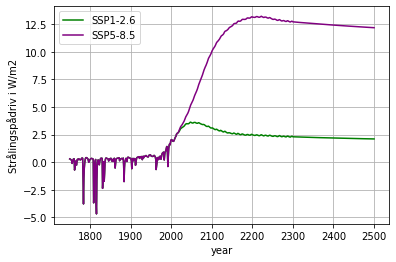

In [3]:
# Plot strålingspådriv for SSP1-2.6 og SSP5-8.5 

df['SSP1-2.6'].plot(color='green')
df['SSP5-8.5'].plot(color='purple')
plt.ylabel('Strålingspådriv i W/m2')
plt.legend()
plt.grid()
#plt.xlim([1750, 2100])

## Fremtidsscenarier med Toboksmodellen 

* Forsøk #1:'SSP1-2.6', bruk strålingspådriv for SSP1-2.6 med alle tilbakekoblingsmekanismer slået på. 

* Forsøk #2:'SSP5-8.5', bruk strålingspådriv for SSP5-8.5 med alle tilbakekoblingsmekanismer slået på. 

For begge forsøk bruker vi de samme tilbakekoblingsverdier fra tidligere, som er basert på middelsverdier hentet fra de globale klimamodellene (se tabell under). 

<figure>
<img src="bilder/table_lambda_values_AR6.png" style="width:70%" bla >
<figcaption align = "center"> 
</figure>


**Sett verdier for varmeoptakk i havet (gamma) og tilbakekoblingseffekter (lambda)**

In [23]:
# varmeoptakk i havet [Wm-2K-1]                                                                                                                                                                           #//
gamma=-0.69  

# sett tilbakekoblingseffekter
lambda_planck=-3.22     # Stefan Boltzmann's 'feedback' [Wm-2K-1] best guesses  [-3.3 to -3.1]                       
lambda_lapse=-0.5      # Lapse rate feedback [Wm-2K-1] best guesses [-1.2 to -0.5]                                  
lambda_vanndamp=1.77       # water vapor feedback [Wm-2K-1] best guesses [1.5 to 2.2]                                   
lambda_sky=0.42      # Clouds feedback [Wm-2K-1] best guesses [0.1 to 1.2]                                       
lambda_albedo=0.35     # Surface albedo feedback [Wm-2K-1] best guesses [0.1 to 0.4]           

# Summen av disse 
lambda_sum=sum([lambda_planck,                                                                                      
    lambda_lapse,                                                                                                   
    lambda_vanndamp,                                                                                                   
    lambda_sky,                                                                                                   
    lambda_albedo]) 

**Kjør toboksmodellen for de to utslippsscenarioene med gjennomsnittsverdien for lamda_sum og studer plottet**

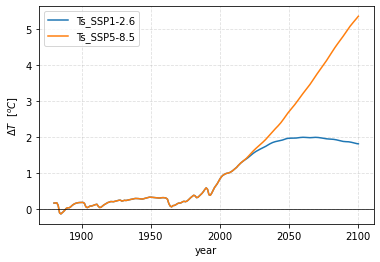

In [5]:
# lager en ny tom dataramme med samme index som den orginale
temp = pd.DataFrame(index=df.index)

# kaller opp funksjonen som regner ut temperaturendringene                                                          
temp['Ts_SSP1-2.6'], To = calculate_temp_anomalies(df['SSP1-2.6'].to_numpy(), lambda_sum, gamma)      # SSP1         
temp['Ts_SSP5-8.5'], To = calculate_temp_anomalies(df['SSP5-8.5'].to_numpy(), lambda_sum, gamma)      # SSP5         

#plotter innholdet i datarammen, starter plottet i 1880
temp.loc[1880:2100].plot(ylabel="$\Delta T$  $[^oC]$")
plt.axhline(y=0, linewidth=0.7, color="black")                                                                      
plt.grid(alpha=0.4, ls='--')  
plt.show()

## Korriger nullnivået

Når politikere og medier snakker om 2-gradersmålet er det beregnet ut relativt til gjennomsnittemperaturen over en bestemt periode. Som default er våre resultater beregnet utifra at 1750 var normalen - altså med andre ord: temperaturendringen relativ til år 1750. 

I den seneste IPCC rapporten beregnes temperaturendringen i forhold til to ulike **reference-perioder**:
1) 1995-2014 (nutid)
2) 1850-1900 (pre-industrielle periode)

For å sammenligne vår modell med de som inngår i IPCC rapporten kan vi korrigere datasettet vårt ved å trekke fra gjennomsnittsverdien til toboksmodellen for de to refernceperiodene.

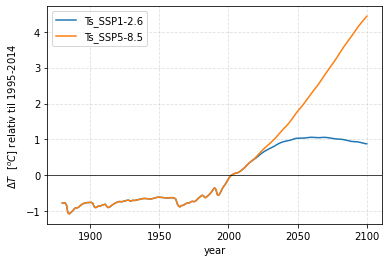

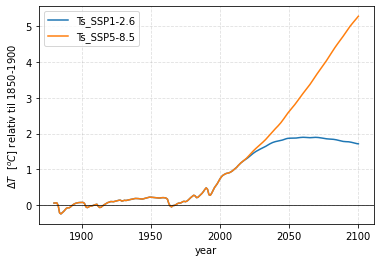

In [6]:
# lager en ny tom dataramme med samme index som den orginale
Tanom1 = pd.DataFrame(index=df.index)
Tanom2 = pd.DataFrame(index=df.index)

# temperatur anomali fra perioden 1995-2014
Tanom1 =  temp-temp.loc[1995:2014].mean() 

# temperatur anomali fra perioden 1850-1900
Tanom2 =  temp-temp.loc[1850:1900].mean() 

# make plot
#plotter innholdet i datarammen, starter plottet i 1880
Tanom1.loc[1880:2100].plot(ylabel="$\Delta T$  $[^oC]$ relativ til 1995-2014")
plt.axhline(y=0, linewidth=0.7, color="black")                                                                      
plt.grid(alpha=0.4, ls='--')  
plt.show()          

# make plot
#plotter innholdet i datarammen, starter plottet i 1880
Tanom2.loc[1880:2100].plot(ylabel="$\Delta T$  $[^oC]$ relativ til 1850-1900")
plt.axhline(y=0, linewidth=0.7, color="black")                                                                      
plt.grid(alpha=0.4, ls='--')  
plt.show()

**Finn temperaturendringen i år 2100**

In [10]:
year = 2100
Tloc = Tanom1['Ts_SSP1-2.6'].loc[year]
print('Temperature change at year', year, 'relative to 1995-2014:', "%.2f" %(Tloc),'°C')

Tloc = Tanom2['Ts_SSP1-2.6'].loc[year]
print('Temperature change at year', year, 'relative to 1850-1900:', "%.2f" %(Tloc),'°C')

Temperature change at year 2100 relative to 1995-2014: 0.88 °C
Temperature change at year 2100 relative to 1850-1900: 1.71 °C


# Spørgsmål til opgaven

### 1 - Undersøk temperaturen inn i framtiden i følge toboksmodellen

* Hva er det samlede strålingspådriv (i W/m2) i år 2100 for SSP1-2.6 og SSP5-8.5?

* Hva er temperaturendringen i år 2100 (relativt til periodene 1995-2014 og 1850-1900) for SSP1-2.6 og SSP5-8.5?

* Hva er den viktigste årsaken til disse endringer?

### 2 - Sammenlign med de globale klimamodellene

I plottet nedenfor vises den globale temperaturendringen simulert av de nyeste og mest avanserte klimamodellene (CMIP6 modellene).

<img src="bilder/IPCC_AR6_WGI_Figure_4_2_subset.png" style="width:50%" >

* Undersøk plottet og diskuter hvordan vår enkle toboksmodell klarer seg i forhold til de globale modellene.

I figuren ser vi at der er ganske stor spredning i temperaturutviklingen blant de globale modellene (se det skraverte område for SSP1-2.6 og SSP3-7.0).

* Hva tror du er den viktigste årsaken til denne usikkerhet i fremtidsprojeksjonene? Diskutér følgende muligheter:
   * Usikkerhet i forcing
   * Usikkerhet i model-fysik (fx. hvordan skyer er representert)
   * Intern klimavariabilitet


* Hvorfor tror du at spredningen vokser jo lenger inn i fremtiden vi kommer? 


# 3 - Lagg din egen "multi-model" ensemble

En modell-ensemble beskriver en samling modeller som gjør de samme eksperimentene som i CMIP6 klimamodellene vist i figuren over. Selv om vi bare har én modell (toboksmodellen) kan vi imitere effekten ved å kjøre modellen med ulike verdier for tilbakekoblingsparameterne. 

Vi bruker lambda-værdiene under "very likely" intervallet (2x standard deviation: mellom 5-95%) i tabellen under for å beregne den samlede standard avvik. Dette gir oss et usikkerhetsinterval med (lamdba_middel - 1STD) som den nedre grensen og (lamdba_middel + 1STD) som den øvre grensen

Vi ka nu kjøre modellen med de nye høye og lave værdiene for lambda. Dette gir oss en omhylningskurve rundt middelsværdien som representerer usikkerheten forbunnet med ulike værdier for tilbakekoblingsmekanimsmene. 

*   Er usikkerheten større eller mindre sammenlignet med CMIP6 modellene (for SSP1-2.6)?
*   Hvilke typer usikkerheter mangler vi når vi bruker denne simple metoden? 

<img src="bilder/table_lambda_values_AR6.png" style="width:100%" >

In [21]:
## Beregn spredning i den samlede tilbakekoblingsfaktor (lamda_sum)

import numpy as np

lambda_planck = (-3.22, -3.4, -3.0, 'high')
lamdba_WV =     (1.77, 1.57, 1.97, 'high') # from Zelinka et al., 2020 (one standard deviation)
lamdba_LR =     (-0.5, -0.7, -0.3, 'high') # from Dessler, 2013; Caldwell et al., 2016; Colman and Hanson, 2017; Zelinka et al., 2020 (one standard deviation)
lambda_albedo = (0.35, 0.1, 0.6, 'medium')
lambda_cloud =  (0.42, -0.1, 0.94, 'high')

# get standard deviation of feedbacks
std_lambda_planck = (lambda_planck[2] - lambda_planck[1])/2
std_lamdba_WV = (lamdba_WV[2] - lamdba_WV[1])/2
std_lamdba_LR = (lamdba_LR[2] - lamdba_LR[1])/2
std_lambda_albedo = (lambda_albedo[2] - lambda_albedo[1])/2
std_lambda_cloud = (lambda_cloud[2] - lambda_cloud[1])/2

# sum of standard deviations
var_lambda_sum = std_lambda_planck**2 + std_lamdba_WV**2 + std_lamdba_LR**2 + std_lambda_albedo**2 + std_lambda_cloud**2

# standard deviation of lambda sum
lambda_sum_SD = np.sqrt(var_lambda_sum)

# add one standard deviation to the central estimate of lambda 
lambda_sum_min = lambda_sum - 0.5*lambda_sum_SD 
lambda_sum_max = lambda_sum + 0.5*lambda_sum_SD

print(lambda_sum_min, lambda_sum_max)

0.6729784543356495


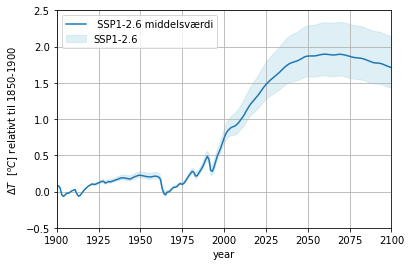

In [57]:
# kaller opp funksjonen som regner ut temperaturendringene                                                          
temp['Ts_SSP1_min'], To = calculate_temp_anomalies(df['SSP1-2.6'].to_numpy(), lambda_sum_min, gamma)      # SSP1  
temp['Ts_SSP1_max'], To = calculate_temp_anomalies(df['SSP1-2.6'].to_numpy(), lambda_sum_max, gamma)      # SSP1  

temp['Ts_SSP5_min'], To = calculate_temp_anomalies(df['SSP5-8.5'].to_numpy(), lambda_sum_min, gamma)      # SSP5   
temp['Ts_SSP5_max'], To = calculate_temp_anomalies(df['SSP5-8.5'].to_numpy(), lambda_sum_max, gamma)      # SSP5   

# relativ til perioden 1850-1900
temp_1850_1900 = temp-temp.loc[1850:1900].mean()  


#Lager omhyllingskurver får å vise spredning i resultatet av modellene.
temp_1850_1900['Ts_SSP1-2.6'].plot(label=' SSP1-2.6 middelsværdi', ylabel="$\Delta T$  $[^oC]$ relativt til 1850-1900")
plt.fill_between(temp_1850_1900.index, temp_1850_1900['Ts_SSP1_min'], temp_1850_1900['Ts_SSP1_max'], color='lightblue',alpha=0.4,label='SSP1-2.6')

#temp_1850_1900['Ts_SSP5-8.5'].plot(label='SSP5-8.5 middelsværdi')
#plt.fill_between(temp_1850_1900.index, temp_1850_1900['Ts_SSP5_min'],temp_1850_1900['Ts_SSP5_max'], color='orange',alpha=0.4,label='SSP5-8.5')

plt.legend(loc='upper left')
plt.xlim(1900,2100)
plt.ylim([-0.5, 2.5])
plt.grid('--')
plt.show()

## Ekstra: Hvilken betydning har dyphavet?

I øvelse 4 så vi at *havet* spillet en viktig rolle for å ta opp den ekstra varme fra atmosfæren særligt siden den industrielle revolution. Varmeopptaket til havet bidrager altså til at bremse den globalle oppvarmingen i atmosfæren. *Hvordan ser dette ut for fremtidens klima?*

Gå opp i programmet bytt ut gamma=-0.69, med gamma=0 og kjør alle cellene på nytt.

* Hva sker for overflatetemperaturen (`Ts`) om vi slår av varmeoptaket til havet? 

* Tror du at havet vil bli ved med at ta opp ekstra varme fra atmosfæren? Hvorfor/hvorfor ikke?

-1.516489227167825 -0.8435107728321753


In [46]:
dff = pd.DataFrame(index=df.index)
dff['ssp1_min'], To = calculate_temp_anomalies(df['SSP1-2.6'].to_numpy(), lambda_sum_min, gamma)   
dff['ssp1_max'], To = calculate_temp_anomalies(df['SSP1-2.6'].to_numpy(), lambda_sum_max, gamma)   


1.5128426921315288 2.248918599263308


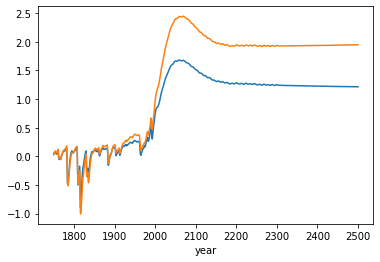

In [50]:
dff['ssp1_min'].plot()
dff['ssp1_max'].plot()
print(dff['ssp1_min'].loc[2100], dff['ssp1_max'].loc[2100])
